# Henry PI 2: Machine Learning
## ANÁLISIS EXPLORATORIO DE DATOS O EDA


### Student: Nelson Alejandro Castro Andrews

## ------------- D A T A --- E X P L O R A T I O N --- I --------------

Importamos librerias necesarias

In [613]:
# Importando las librerias necesarias
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as rts
import fastparquet as fpt
import pyarrow as pw
import seaborn as sns
pd.set_option("display.max_columns", 40)
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from geopy.geocoders import Nominatim 
from geopy.extra.rate_limiter import RateLimiter



# warnings

In [614]:
import warnings

def disable_pandas_warnings():
    warnings.resetwarnings()  # Maybe somebody else is messing with the warnings system?
    warnings.filterwarnings('ignore')  # Ignore everything
    # ignore everything does not work: ignore specific messages, using regex
    warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')
    warnings.filterwarnings('ignore', '.*indexing past lexsort depth may impact performance*')
disable_pandas_warnings()

### Ingesto el archivo tipo parquet (train.parquet) con los datos de entrenamiento a utilizar en Pandas.

In [615]:
parquet= r'train.parquet'
df = pd.read_parquet(parquet, engine='auto')
df.head(5)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,1,1,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


Obtenemos informacion basica del dataframe

In [617]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [618]:
#describe y shape
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


In [619]:
# Ahora obtenemos información básica sobre el DataFrame, junto con el valor medio de la característica que usaremos para crear la columna de destino
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [620]:
df.shape

(346479, 22)

### Completando los valores faltantes:

In [621]:
df.columns
df.head()
df.tail()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
346474,7050982281,https://evansville.craigslist.org/apa/d/evansv...,evansville,https://evansville.craigslist.org,672,apartment,660,1,1.0,1,1,1,0,0,0,laundry on site,None,https://images.craigslist.org/00x0x_9oaHKZ8Ilp...,"The pool, the office, the 24-hour on-site laun...",37.9591,-87.5293,in
346475,7049418251,https://sandiego.craigslist.org/ssd/apa/d/chul...,san diego,https://sandiego.craigslist.org,2122,apartment,1099,2,2.0,1,1,1,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00O0O_6QsU4p5WMh...,Seize your chance to live in our beautiful apa...,32.6279,-117.0370,ca
346476,7048268235,https://columbia.craigslist.org/apa/d/columbia...,columbia,https://columbia.craigslist.org,1014,apartment,1104,2,2.0,1,1,0,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00000_dpNWqzYhGK...,Tucked into the rolling landscape of Southeast...,33.9659,-80.9355,sc
346477,7026721229,https://nd.craigslist.org/apa/d/minot-open-con...,north dakota,https://nd.craigslist.org,935,apartment,1050,2,2.0,0,0,0,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00Z0Z_65g6Cty1RX...,Enjoy living at Southwood Apartments! Located ...,48.1995,-101.2800,nd
346478,7049657819,https://buffalo.craigslist.org/apa/d/buffalo-a...,buffalo,https://buffalo.craigslist.org,1300,apartment,1350,2,2.0,1,0,1,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00w0w_7irvBxq409...,Description Huge spacious 2 bedroom. Beauti...,42.8997,-78.8803,ny


In [622]:
# unique y value_counts
df['price'].unique()
df.price.value_counts()

750     3798
800     3603
850     3583
1200    3427
950     3257
        ... 
3071       1
5386       1
23         1
3501       1
5015       1
Name: price, Length: 3854, dtype: int64

Buscamos registros duplicados

In [623]:
df.duplicated().value_counts()

False    346479
dtype: int64

In [624]:
### count, min, max, mean, median, std y corr
df.corr()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
id,1.000000,-0.001062,-0.005211,-0.020890,-0.036490,0.043673,0.035597,0.016282,0.007329,0.019418,-0.030653,-0.001593,-0.082815
price,-0.001062,1.000000,0.000008,0.000071,0.000156,0.001026,0.001044,0.001024,-0.000423,-0.000186,-0.000374,-0.001486,0.000810
sqfeet,-0.005211,0.000008,1.000000,0.004030,0.010611,-0.003808,-0.002791,-0.002164,-0.001234,-0.000150,0.001235,0.007120,-0.003083
beds,-0.020890,0.000071,0.004030,1.000000,0.378980,-0.024088,-0.013665,-0.001809,-0.012290,-0.005221,0.002834,0.008823,0.008232
baths,-0.036490,0.000156,0.010611,0.378980,1.000000,-0.019610,0.018844,-0.014784,0.019484,0.008324,0.039178,-0.080293,-0.005556
cats_allowed,0.043673,0.001026,-0.003808,-0.024088,-0.019610,1.000000,0.887352,0.016858,0.122285,0.049270,-0.059488,-0.016043,0.033745
dogs_allowed,0.035597,0.001044,-0.002791,-0.013665,0.018844,0.887352,1.000000,0.013732,0.129010,0.049180,-0.038191,-0.056580,0.018896
smoking_allowed,0.016282,0.001024,-0.002164,-0.001809,-0.014784,0.016858,0.013732,1.000000,-0.223676,-0.096233,-0.161876,-0.177118,0.163744
wheelchair_access,0.007329,-0.000423,-0.001234,-0.012290,0.019484,0.122285,0.129010,-0.223676,1.000000,0.192750,0.195553,0.002498,-0.025412
electric_vehicle_charge,0.019418,-0.000186,-0.000150,-0.005221,0.008324,0.049270,0.049180,-0.096233,0.192750,1.000000,0.069185,0.025800,-0.061036


In [625]:
# Ordenando datos
df.sort_index()
df.sort_values(["price"], ascending=False).head()


,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
106214,7035456041,https://columbusga.craigslist.org/apa/d/columb...,columbus,https://columbusga.craigslist.org,2768307249,apartment,1118,2,1.5,1,1,1,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00V0V_7KSQPod9NT...,Club Hill has a Raleigh Floorplan ready for Pr...,32.4779,-84.8980,ga
98438,7050028818,https://inlandempire.craigslist.org/apa/d/chin...,inland empire,https://inlandempire.craigslist.org,21701907,apartment,860,2,2.0,1,1,1,1,0,0,w/d in unit,None,https://images.craigslist.org/00O0O_cwgJCJ5tJt...,"Relax, your search is over. Welcome home to Th...",33.9829,-117.7490,ca
265155,7047477916,https://hudsonvalley.craigslist.org/apa/d/pelh...,hudson valley,https://hudsonvalley.craigslist.org,18502000,apartment,900,2,1.0,1,0,1,0,0,0,laundry in bldg,no parking,https://images.craigslist.org/00000_7Q3kg4Fw28...,2 Bedroom Apartment in the cozy Village of Pel...,40.9129,-73.8089,ny
79076,7047477447,https://hudsonvalley.craigslist.org/apa/d/pelh...,hudson valley,https://hudsonvalley.craigslist.org,18502000,apartment,900,2,1.0,1,0,1,0,0,0,laundry in bldg,no parking,https://images.craigslist.org/00000_7Q3kg4Fw28...,2 Bedroom Apartment in the cozy Village of Pel...,40.9129,-73.8089,ny
297036,7017801737,https://keys.craigslist.org/apa/d/hollywood-pe...,florida keys,https://keys.craigslist.org,12000000,apartment,9000,7,8.5,0,0,0,1,0,0,None,attached garage,https://images.craigslist.org/00U0U_kwc909D57x...,MANSION IN THE SKY!!! Breathtaking oceanfront ...,25.9941,-80.1183,fl


Buscamos si existen valores nulos

In [626]:
df.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

# Se Crean las columnas P1 y Dato / La Cual Me Ayudara con el Modelo Predictivo recogiendo informacion relevante de la columna baths

In [627]:
import math
valores = [-math.inf, 1, 2, math.inf]
category= ['low','medium','high']
df= df.assign(P1= pd.cut(x=df['baths'], bins=valores, labels=category, include_lowest=True))
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,P1
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id,medium
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co,low
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va,medium
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,1,1,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az,medium
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,7050982281,https://evansville.craigslist.org/apa/d/evansv...,evansville,https://evansville.craigslist.org,672,apartment,660,1,1.0,1,1,1,0,0,0,laundry on site,None,https://images.craigslist.org/00x0x_9oaHKZ8Ilp...,"The pool, the office, the 24-hour on-site laun...",37.9591,-87.5293,in,low
346475,7049418251,https://sandiego.craigslist.org/ssd/apa/d/chul...,san diego,https://sandiego.craigslist.org,2122,apartment,1099,2,2.0,1,1,1,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00O0O_6QsU4p5WMh...,Seize your chance to live in our beautiful apa...,32.6279,-117.0370,ca,medium
346476,7048268235,https://columbia.craigslist.org/apa/d/columbia...,columbia,https://columbia.craigslist.org,1014,apartment,1104,2,2.0,1,1,0,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00000_dpNWqzYhGK...,Tucked into the rolling landscape of Southeast...,33.9659,-80.9355,sc,medium
346477,7026721229,https://nd.craigslist.org/apa/d/minot-open-con...,north dakota,https://nd.craigslist.org,935,apartment,1050,2,2.0,0,0,0,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00Z0Z_65g6Cty1RX...,Enjoy living at Southwood Apartments! Located ...,48.1995,-101.2800,nd,medium


In [628]:
df['Dato'] = df['P1'].apply(lambda x : 0 if x=='low' else 1)
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,P1,Dato
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id,medium,1
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co,low,0
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va,medium,1
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,1,1,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az,medium,1
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn,low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,7050982281,https://evansville.craigslist.org/apa/d/evansv...,evansville,https://evansville.craigslist.org,672,apartment,660,1,1.0,1,1,1,0,0,0,laundry on site,None,https://images.craigslist.org/00x0x_9oaHKZ8Ilp...,"The pool, the office, the 24-hour on-site laun...",37.9591,-87.5293,in,low,0
346475,7049418251,https://sandiego.craigslist.org/ssd/apa/d/chul...,san diego,https://sandiego.craigslist.org,2122,apartment,1099,2,2.0,1,1,1,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00O0O_6QsU4p5WMh...,Seize your chance to live in our beautiful apa...,32.6279,-117.0370,ca,medium,1
346476,7048268235,https://columbia.craigslist.org/apa/d/columbia...,columbia,https://columbia.craigslist.org,1014,apartment,1104,2,2.0,1,1,0,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00000_dpNWqzYhGK...,Tucked into the rolling landscape of Southeast...,33.9659,-80.9355,sc,medium,1
346477,7026721229,https://nd.craigslist.org/apa/d/minot-open-con...,north dakota,https://nd.craigslist.org,935,apartment,1050,2,2.0,0,0,0,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00Z0Z_65g6Cty1RX...,Enjoy living at Southwood Apartments! Located ...,48.1995,-101.2800,nd,medium,1


# Dummies

In [629]:
dummies = pd.get_dummies(df, columns=["state", "type"])

In [631]:
types = dummies[["price", "Dato", "P1",]]
types

,price,Dato,P1
0,1350,1,medium
1,1115,0,low
2,1129,1,medium
3,1580,1,medium
4,995,0,low
...,...,...,...
346474,672,0,low
346475,2122,1,medium
346476,1014,1,medium
346477,935,1,medium


In [632]:
# Buscamos registros duplicados (spoiler: no hay ninguno)

df.duplicated().value_counts()

False    346479
dtype: int64

In [633]:
#  Buscamos valores faltantes por característica (encontramos muchos de ellos, particularmente en habitaciones, dormitorios, surface_total, surface_covered y price_period)
# (spoiler: no hay ninguno)

df.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
P1                              0
Dato                            0
dtype: int64

---------- G E N E R A N D O --- L A  C O L U M N A  --- T A R G E T  ----------

In [634]:
#  Comenzamos creando una copia del conjunto de datos original y buscando valores faltantes en la columna 'precio' (que también podemos ver arriba)
#  Nuestros objetivos se obtendrán de la información contenida en esta columna, por lo que cualquier dato de entrenamiento sin un valor objetivo asociado será prácticamente inútil.

df_Xy = df.copy()
df_Xy.price.isnull().sum()

0

##  Podemos ver que nos faltan 0 valores en la columna 'precio', la que usaremos para crear nuestra clasificación objetivo basada en su valor medio.

Procedimos a eliminar esos registros, esto se debe a que necesitamos que tengan un valor objetivo para entrenar a nuestros modelos.

In [635]:
df_Xy.dropna(subset=['price'], inplace=True)

price_mean_after_dropna = df_Xy.price.mean()

print(f'• train DataFrame Shape: {df.shape}')
print(f'• DataFrame Shape (after dropna-price): {df_Xy.shape}\n')
print(f'• DataFrame Price column mean (after dropna-price): {price_mean_after_dropna}')

• train DataFrame Shape: (346479, 24)
• DataFrame Shape (after dropna-price): (346479, 24)

• DataFrame Price column mean (after dropna-price): 9664.419699317996


In [636]:
# Comprobamos de nuevo si faltan valores
df_Xy.price.isnull().sum()

0

In [637]:
# Comprobamos los valores extremos en la columna
df_Xy.price.min(), df_Xy.price.max()

(0, 2768307249)

In [638]:
# Comprobamos la cantidad de apariciones de estos valores extremos

df_Xy.price.value_counts()[0], df_Xy.price.value_counts()[2768307249]

(1175, 1)

## ACTUALIZACIÓN:

### En el siguiente par de celdas obtenemos el precio medio de la columna después de eliminar sus valores atípicos y terminara siendo la que usamos para crear la columna de Target con la que se entrenarían nuestros modelos.
### Esta estrategia, implementada al final del proceso, mejoró radicalmente los resultados de nuestro modelo y fue una respuesta al problema encontrado en la 'Nota importante' registrada a continuación.

In [639]:
Q1 = df_Xy.price.quantile(0.25)
Q3 = df_Xy.price.quantile(0.75)
IQR = Q3 - Q1
IQR, df_Xy.shape

(590.0, (346479, 24))

In [640]:
df_Xy_no = df_Xy[~((df_Xy['price'] < (Q1 - 1.5 * IQR)) | (df_Xy['price'] > (Q3 + 1.5 * IQR)))]
df_Xy_no.shape

(329576, 24)

In [641]:
price_mean_after_do = df_Xy_no.price.mean()
print(f'Media del precio después de abandonar los dropping outliers: {price_mean_after_do}')

Media del precio después de abandonar los dropping outliers: 1088.5541999417433


Verificaremos la columna long (longitud) y lat (latitud)

In [642]:
#Buscamos los valores unicos
df['lat'].unique()

array([43.5851, 38.9137, 36.7922, ..., 42.507 , 43.7198, 42.8997])

In [643]:
df['long'].unique()

array([-116.225 , -104.78  ,  -76.1643, ...,  -73.1824,  -85.3338,
        -70.8932])

Creamos un nuevo dataframe para examinar mas de cerca si los datos de  lat y la long pertenecen a la region y estado indicado

In [644]:
df_latitud_longitud= df[['region','state', 'lat', 'long']]

Revisamos que que regiones tienen laitud y logitud nulos

In [645]:
df_latitud_longitud[(df_latitud_longitud['lat'].isnull())]

,region,state,lat,long
62,worcester / central MA,ma,NaN,NaN
369,grand rapids,mi,NaN,NaN
501,denver,co,NaN,NaN
841,columbia,sc,NaN,NaN
976,sarasota-bradenton,fl,NaN,NaN
...,...,...,...,...
345789,toledo,oh,NaN,NaN
345847,huntsville / decatur,al,NaN,NaN
345856,lubbock,tx,NaN,NaN
345995,sarasota-bradenton,fl,NaN,NaN


Examinanos los valores de latitud y longitud de una region en especifico

In [646]:
df_latitud_longitud[(df_latitud_longitud['region']=='denver')]

,region,state,lat,long
306,denver,co,39.6640,-104.845
407,denver,co,39.7415,-104.857
501,denver,co,NaN,NaN
677,denver,co,39.7438,-104.885
1318,denver,co,39.7835,-104.967
...,...,...,...,...
345797,denver,co,39.7378,-104.815
345829,denver,co,39.6500,-104.988
345838,denver,co,39.7441,-105.126
345917,denver,co,39.5692,-105.105


Se evidencia que cada region cuenta con una latitud y longitud especifica imposibilitando el cambio a un valor unico, ya que no se brindaria la ubicacion exacta del inmueble. Ademas desconozco el criterio empleado con dichos valores.

Ahora, se calcula el porcentaje de nulos en la columna latitud y longitud (es la misma cantidad) para evidenciar el impacto que tiene sobre el dataset

In [647]:
nulos= df['lat'].isnull().sum()
total= len(df['lat'])
porcentaje= ((nulos/ total)*100)
print('El porcentaje de nulos en la columna lat', porcentaje)# es irrelevante para hacer una eliminacion de las columnas

El porcentaje de nulos en la columna lat 0.49699981817079825


# Transformaciones 

Se renombran las columnas lat y long

In [648]:
df.rename(columns={'lat':'latitude', 'long':'longitude'}, inplace= True)

Se confirma el cambio

In [649]:
df.head(2)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,latitude,longitude,state,P1,Dato
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.225,id,medium,1
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.780,co,low,0


Graficamos con dispersion la latitude y longitude, para confirmar que se encuentran en el pais indicado(EEUU) por lo general es: Estándar decimal simple	latitud:37.09024, longitud:-95.712891

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

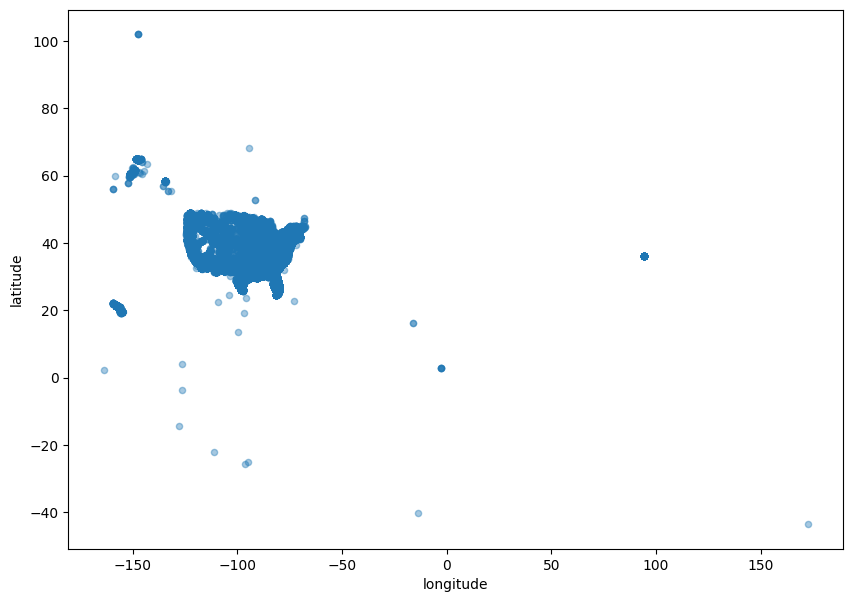

In [650]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10,7))

Existen puntos que se encuentran afueras de los limites de los EEUU, por esta razon no se tomara en cuenta estas columnas para el analisis

Analicemos las columnas laundry_options y parking_options 

In [651]:
nulos= df['laundry_options'].isnull().sum()
total= len(df['laundry_options'])
porcentaje= ((nulos/ total)*100)
print('El porcentaje de nulos en la columna laundry_options', porcentaje)

El porcentaje de nulos en la columna laundry_options 20.541216062156725


In [652]:
nulos= df['parking_options'].isnull().sum()
total= len(df['parking_options'])
porcentaje= ((nulos/ total)*100)
print('El porcentaje de nulos en la columna parking_options', porcentaje)

El porcentaje de nulos en la columna parking_options 36.56267768032117


Como observamos representa un valor mayor al 10% de valores faltantes, podrian ser datos importantes como caracteristica del inmueble si no tuvise valores perdidos o faltantes, ahora para el estudio de este caso se obviaran estas columnas. 

In [653]:
#Se eliminan las columnas mencionadas
df.drop(['laundry_options','parking_options'], axis= 1,  inplace=True)
df.shape

(346479, 22)

Los atribulos no seleccionados para este analisis son:

In [654]:
df.drop(['id', 'url', 'region_url', 'image_url', 'latitude', 'longitude'], axis= 1,  inplace=True)

Se confirman los cambios realizados

In [655]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   region                   346479 non-null  object  
 1   price                    346479 non-null  int64   
 2   type                     346479 non-null  object  
 3   sqfeet                   346479 non-null  int64   
 4   beds                     346479 non-null  int64   
 5   baths                    346479 non-null  float64 
 6   cats_allowed             346479 non-null  int64   
 7   dogs_allowed             346479 non-null  int64   
 8   smoking_allowed          346479 non-null  int64   
 9   wheelchair_access        346479 non-null  int64   
 10  electric_vehicle_charge  346479 non-null  int64   
 11  comes_furnished          346479 non-null  int64   
 12  description              346477 non-null  object  
 13  state                    346479 non-null  ob

Se observa la informacion de la columna type, para saber si requiere algun cambio

In [656]:
df['type'].unique()

array(['house', 'apartment', 'duplex', 'loft', 'condo', 'manufactured',
       'townhouse', 'in-law', 'cottage/cabin', 'flat', 'assisted living',
       'land'], dtype=object)

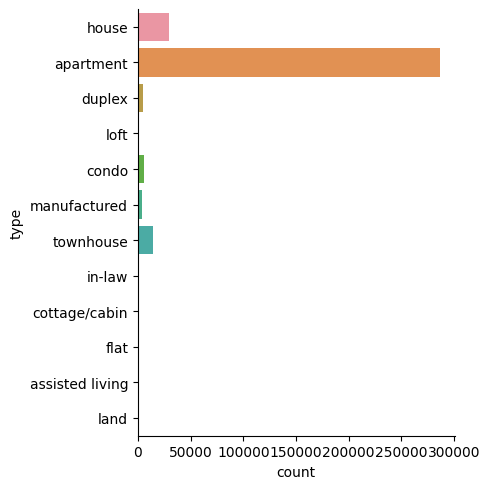

In [657]:
sns.catplot(y = "type", data = df, kind = "count")

Ahora, se crea la columna category_price utilizando la columna price

In [658]:
import math
valores = [-math.inf, 999, 1999, math.inf]
category= ['low','medium','high']
df2= df.assign(category_price= pd.cut(x=df['price'], bins=valores, labels=category, include_lowest=True))
df2

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,description,state,P1,Dato,category_price
0,boise,1350,house,1200,2,2.0,1,1,1,0,0,0,Super cute row house in the Boise bench area. ...,id,medium,1,medium
1,colorado springs,1115,apartment,694,1,1.0,1,1,1,0,0,0,Windtree Apartment Homes currently has a spaci...,co,low,0,medium
2,norfolk / hampton roads,1129,apartment,900,2,2.0,0,0,1,0,0,0,Call Today! show contact info Indian Lakes ...,va,medium,1,medium
3,phoenix,1580,house,1469,3,2.0,1,1,1,0,0,0,Cody Anderson Two Brothers Realty License #: S...,az,medium,1,medium
4,nashville,995,apartment,700,1,1.0,1,1,1,0,0,0,To schedule a tour We now book our tour appoin...,tn,low,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,evansville,672,apartment,660,1,1.0,1,1,1,0,0,0,"The pool, the office, the 24-hour on-site laun...",in,low,0,low
346475,san diego,2122,apartment,1099,2,2.0,1,1,1,0,0,0,Seize your chance to live in our beautiful apa...,ca,medium,1,high
346476,columbia,1014,apartment,1104,2,2.0,1,1,0,0,0,0,Tucked into the rolling landscape of Southeast...,sc,medium,1,medium
346477,north dakota,935,apartment,1050,2,2.0,0,0,0,0,0,0,Enjoy living at Southwood Apartments! Located ...,nd,medium,1,low


Se grafica los datos de la columna creada para visualizar la cantidad de inmubles que existe con price low, medium y high

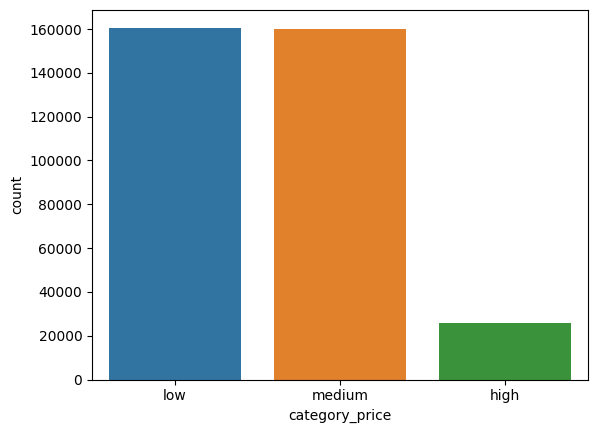

In [659]:
sns.countplot(x='category_price', data=df2) #equivelante a sns.countplot(df.Conversion2)
plt.show()

Se crea una columna target la cual me indique 1 para los inmuebles con price low y 0 para los inmuebles con price medium y high

In [660]:
df2['target'] = df2['category_price'].apply(lambda x : 1 if x=='low' else 0)
df2

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,description,state,P1,Dato,category_price,target
0,boise,1350,house,1200,2,2.0,1,1,1,0,0,0,Super cute row house in the Boise bench area. ...,id,medium,1,medium,0
1,colorado springs,1115,apartment,694,1,1.0,1,1,1,0,0,0,Windtree Apartment Homes currently has a spaci...,co,low,0,medium,0
2,norfolk / hampton roads,1129,apartment,900,2,2.0,0,0,1,0,0,0,Call Today! show contact info Indian Lakes ...,va,medium,1,medium,0
3,phoenix,1580,house,1469,3,2.0,1,1,1,0,0,0,Cody Anderson Two Brothers Realty License #: S...,az,medium,1,medium,0
4,nashville,995,apartment,700,1,1.0,1,1,1,0,0,0,To schedule a tour We now book our tour appoin...,tn,low,0,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,evansville,672,apartment,660,1,1.0,1,1,1,0,0,0,"The pool, the office, the 24-hour on-site laun...",in,low,0,low,1
346475,san diego,2122,apartment,1099,2,2.0,1,1,1,0,0,0,Seize your chance to live in our beautiful apa...,ca,medium,1,high,0
346476,columbia,1014,apartment,1104,2,2.0,1,1,0,0,0,0,Tucked into the rolling landscape of Southeast...,sc,medium,1,medium,0
346477,north dakota,935,apartment,1050,2,2.0,0,0,0,0,0,0,Enjoy living at Southwood Apartments! Located ...,nd,medium,1,low,1


Se verifican los cambios realizados

In [661]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   region                   346479 non-null  object  
 1   price                    346479 non-null  int64   
 2   type                     346479 non-null  object  
 3   sqfeet                   346479 non-null  int64   
 4   beds                     346479 non-null  int64   
 5   baths                    346479 non-null  float64 
 6   cats_allowed             346479 non-null  int64   
 7   dogs_allowed             346479 non-null  int64   
 8   smoking_allowed          346479 non-null  int64   
 9   wheelchair_access        346479 non-null  int64   
 10  electric_vehicle_charge  346479 non-null  int64   
 11  comes_furnished          346479 non-null  int64   
 12  description              346477 non-null  object  
 13  state                    346479 non-null  ob

Correlaciones de variables

In [662]:
#se crea una lista con los atributos de los inmuebles
atributos= df2[['sqfeet','beds','baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed','wheelchair_access', 'electric_vehicle_charge','comes_furnished','target', 'price']]

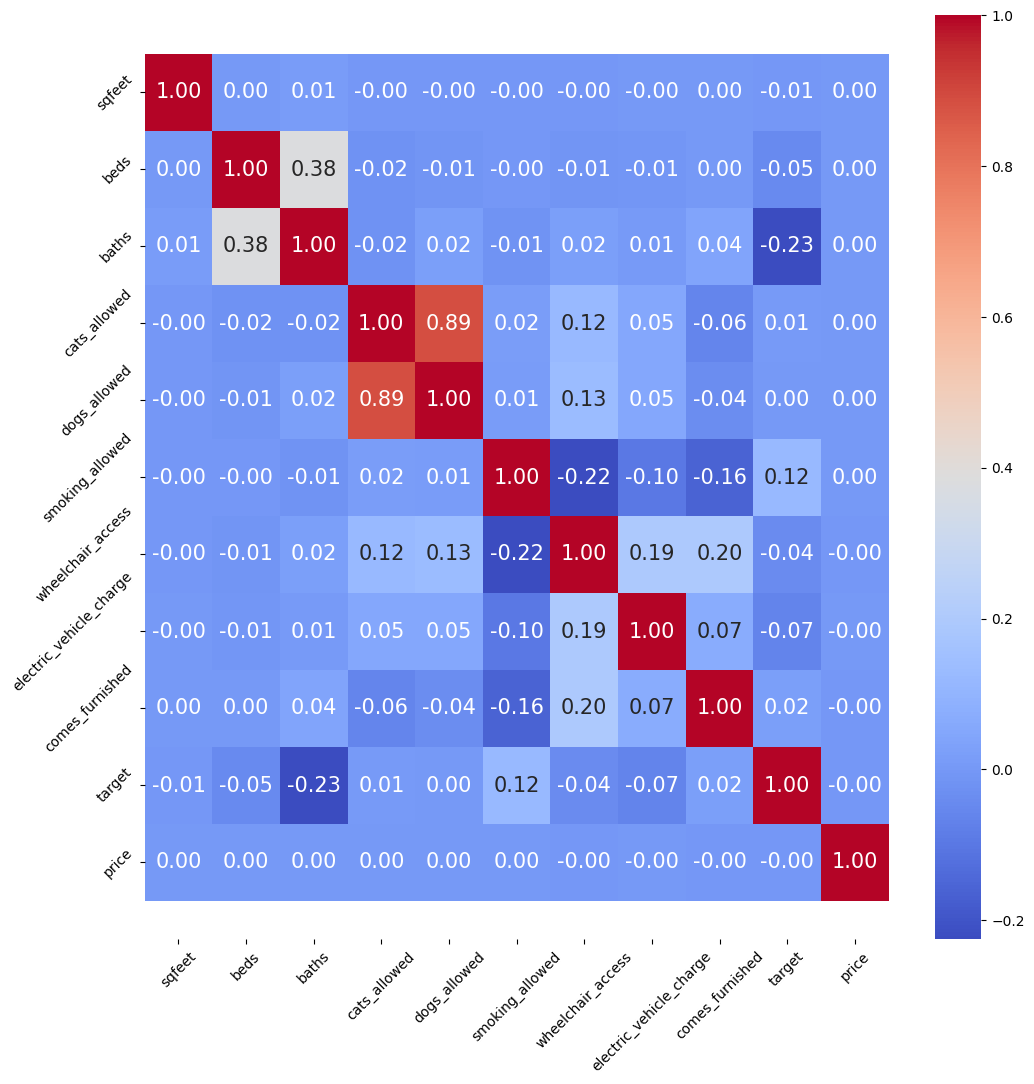

In [556]:
def plot_corre_heatmap(corr):
    '''
   función que grafica un heatmap de correlación
    '''
    plt.figure(figsize=(12,12))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un problema de visualización
    b, t = plt.ylim() # valores para bottom y top
    b += 0.5 # Agrega 0.5 al bottom
    t -= 0.5 # Resta 0.5 de la parte de top
    plt.ylim(b, t) # actualizar los valores y lim(bottom, top)
    plt.show()

corr = atributos.corr()
plot_corre_heatmap(corr)

tabla train a utilizar para este modelo

In [663]:
train = df2 
train.head(2)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,description,state,P1,Dato,category_price,target
0,boise,1350,house,1200,2,2.0,1,1,1,0,0,0,Super cute row house in the Boise bench area. ...,id,medium,1,medium,0
1,colorado springs,1115,apartment,694,1,1.0,1,1,1,0,0,0,Windtree Apartment Homes currently has a spaci...,co,low,0,medium,0


Dado la cantidad de nulos y los valores no pertenecientes a las columnas latitud y longitud, y la escasa correlaciones entre las caracteristicas y el precio del inmueble, tomé baths para obtener palabras reelevantes que me permitan deducir si un inmueble tiene precio bajo o alto.

Vemos si existen descripciones faltantes en la columna descripción

In [664]:
train['P1'].isnull().sum()

0

Eliminamos las descripciones vacías porque mejora la performance del modelo

In [665]:
train.dropna(subset='P1', inplace=True)

Revisamos que no hayan quedado registros con descripciones vacías

In [666]:
train['P1'].isnull().sum()

0

In [667]:
df = df_Xy.drop(['id', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge'], axis=1)
print(f'• Training DataFrame Shape: {df.shape}\n')
print(f'• Training DataFrame Columns: {df.columns}\n')

• Training DataFrame Shape: (346479, 18)

• Training DataFrame Columns: Index(['url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'comes_furnished', 'laundry_options', 'parking_options',
       'image_url', 'description', 'lat', 'long', 'state', 'P1', 'Dato'],
      dtype='object')



In [668]:
df.describe()

,price,sqfeet,beds,baths,comes_furnished,lat,long,Dato
count,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,344757.000000,344757.000000,346479.000000
mean,9.664420e+03,1.066326e+03,1.903189,1.480339,0.048141,37.234363,-92.705415,0.477025
std,4.703573e+06,2.018537e+04,3.162685,0.608246,0.214065,5.550956,16.551071,0.499473
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-43.533300,-163.894000,0.000000
25%,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,33.453100,-100.784000,0.000000
50%,1.036000e+03,9.490000e+02,2.000000,1.000000,0.000000,37.650100,-87.710800,0.000000
75%,1.395000e+03,1.150000e+03,2.000000,2.000000,0.000000,41.137900,-81.174600,1.000000
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,102.036000,172.633000,1.000000


In [669]:
df.duplicated().value_counts()

False    346479
dtype: int64

Podemos ver que en este caso no tenemos registros duplicados, después de eliminar las columnas redundantes e identificadoras NO obtuvimos registros duplicados.

igual Procedimos a eliminarlos (para estar 100% seguros XD).

In [670]:
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    346479
dtype: int64

## ---------------- Análisis Exploratorio de Datos--- 2 ----------------
### ---------------------- ENCONTRAR LAS TRANSFORMACIONES ADECUADAS ----------------------
En esta sección analizaremos las características de nuestro conjunto de datos agrupándolas por el tipo de datos representados en ellos (fecha, ubicación, descripción de la propiedad e información publicitaria).

De esta manera, podremos determinar las mejores transformaciones a realizar en cada uno de ellos con el fin de alimentar nuestros modelos con los datos de mejor calidad que podamos obtener.

In [671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346479 entries, 0 to 346478
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   url              346479 non-null  object  
 1   region           346479 non-null  object  
 2   region_url       346479 non-null  object  
 3   price            346479 non-null  int64   
 4   type             346479 non-null  object  
 5   sqfeet           346479 non-null  int64   
 6   beds             346479 non-null  int64   
 7   baths            346479 non-null  float64 
 8   comes_furnished  346479 non-null  int64   
 9   laundry_options  275308 non-null  object  
 10  parking_options  219797 non-null  object  
 11  image_url        346479 non-null  object  
 12  description      346477 non-null  object  
 13  lat              344757 non-null  float64 
 14  long             344757 non-null  float64 
 15  state            346479 non-null  object  
 16  P1               346

In [672]:
print(f'• Total registers: {len(df)}')
print('• Null values per feature:')
df.isnull().sum()

• Total registers: 346479
• Null values per feature:


url                     0
region                  0
region_url              0
price                   0
type                    0
sqfeet                  0
beds                    0
baths                   0
comes_furnished         0
laundry_options     71171
parking_options    126682
image_url               0
description             2
lat                  1722
long                 1722
state                   0
P1                      0
Dato                    0
dtype: int64

# Aquí creamos una función para recopilar información sobre un conjunto específico de características de un conjunto de datos

In [673]:
def get_info(feature_list, dataset=df, maxmin=False, stats=False):
    for x in feature_list:
        types = set()
        for y in dataset[x]:
            types.add(type(y))
        print(f'\n----- {x} -----\n •Data types: {types}\n •Missing values:')
        print(dataset[x].isnull().value_counts(),'\n')
        if maxmin:
            print(f' •Min: {dataset[x].min()}\n •Max: {dataset[x].max()}\n')
        if stats:
            print(f' •Mean: {dataset[x].mean()}\n •Median: {dataset[x].median()}\n •Mode: {dataset[x].mode()}\n')

In [674]:
# 1) CARACTERÍSTICAS DE LA UBICACIÓN: LAT & LON

location_features = ['lat', 'long']

get_info(location_features[:-2])
get_info(location_features[-2:], maxmin=True)


----- lat -----
 •Data types: {<class 'float'>}
 •Missing values:
False    344757
True       1722
Name: lat, dtype: int64 

 •Min: -43.5333
 •Max: 102.036


----- long -----
 •Data types: {<class 'float'>}
 •Missing values:
False    344757
True       1722
Name: long, dtype: int64 

 •Min: -163.894
 •Max: 172.633



In [675]:
print(f"Rows missing 'lat' values: {len(df[df['lat'].isnull()])}")
print(f"Rows missing 'long' values: {len(df[df['long'].isnull()])}")
#print(f"Rows missing both 'lat' and 'lon' values (1): {len(df[df['lat'].isnull()][df['long'].isnull()])}")
print(f"Rows missing both 'lat' and 'long' values (2): {len(df[df['lat'].isnull()][df[df['lat'].isnull()]['long'].isnull()])}")

Rows missing 'lat' values: 1722
Rows missing 'long' values: 1722
Rows missing both 'lat' and 'long' values (2): 1722


In [676]:
df[df['lat'].isnull()].sample(10)

,url,region,region_url,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,P1,Dato
301394,https://killeen.craigslist.org/apa/d/4307-camb...,killeen / temple / ft hood,https://killeen.craigslist.org,1075,duplex,1260,3,2.0,0,w/d hookups,attached garage,https://images.craigslist.org/01212_2iw1qyrcbK...,"Recently built, still new, stunning and amazin...",NaN,NaN,tx,medium,1
71067,https://austin.craigslist.org/apa/d/unbeatable...,austin,https://austin.craigslist.org,1831,apartment,1287,2,2.0,0,w/d in unit,detached garage,https://images.craigslist.org/00w0w_2hDM7ONhWM...,Hill country and downtown views. ðð Supe...,NaN,NaN,tx,medium,1
249106,https://santabarbara.craigslist.org/apa/d/bedr...,santa barbara,https://santabarbara.craigslist.org,1700,apartment,844,2,2.0,0,w/d in unit,attached garage,https://images.craigslist.org/00N0N_diUy5r2dgZ...,I am a recent graduate looking for a roommate....,NaN,NaN,ca,medium,1
257910,https://danville.craigslist.org/apa/d/nice-fro...,danville,https://danville.craigslist.org,795,house,1180,3,2.0,0,None,None,https://images.craigslist.org/00z0z_24m1QSgRKZ...,If you love big shade trees and brick patio wi...,NaN,NaN,va,medium,1
140104,https://newjersey.craigslist.org/apa/d/new-dis...,north jersey,https://newjersey.craigslist.org,2209,apartment,1000,2,1.0,0,w/d in unit,None,https://images.craigslist.org/01212_LwJ2dZVaMa...,VIEW OUR WEBSITE: http://www.meridiametro.com...,NaN,NaN,nj,low,0
90474,https://desmoines.craigslist.org/apa/d/just-mi...,des moines,https://desmoines.craigslist.org,1365,house,1600,3,2.0,0,w/d in unit,off-street parking,https://images.craigslist.org/00E0E_evB7PlUniE...,This is a newly renovated ranch home. This ho...,NaN,NaN,ia,medium,1
2865,https://kansascity.craigslist.org/apa/d/dont-m...,"kansas city, MO",https://kansascity.craigslist.org,952,apartment,1100,2,1.0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00y0y_jho0s8T1p7...,ALL NEW UPDATED APARTMENT! ALL BLACK APPLIANC...,NaN,NaN,ks,low,0
207219,https://dallas.craigslist.org/ndf/apa/d/new-ci...,dallas / fort worth,https://dallas.craigslist.org,1290,apartment,650,1,1.0,0,w/d in unit,None,https://images.craigslist.org/00e0e_1fHJ7iIv1y...,For more information please call or register o...,NaN,NaN,tx,low,0
163439,https://denver.craigslist.org/apa/d/super-soci...,denver,https://denver.craigslist.org,1575,apartment,805,1,1.0,0,w/d in unit,attached garage,https://images.craigslist.org/00m0m_2josUU2jwk...,Welcome to North Wash Park Capitol Hill Speer ...,NaN,NaN,co,low,0
60994,https://cnj.craigslist.org/apa/d/leasing-now-g...,central NJ,https://cnj.craigslist.org,1770,apartment,795,1,1.0,0,laundry on site,None,https://images.craigslist.org/00r0r_lJDhRTqhpz...,VIEW OUR WEBSITE: https://www.meridialifestyl...,NaN,NaN,nj,low,0


#### Para analizar si los valores no faltantes para latitudes y longitudes se encuentran realmente dentro del territorio Norte Americano, necesitamos definir ciertos límites para ello, más allá de los cuales no debemos esperar encontrar ningún valor lat o long. 

##### El siguiente mapa puede ayudarnos a estimar los siguientes límites:

Latitudes (south to north) that encompass EEUU territory: 25.11, 49.41

Longitudes (west to east) that encompass EEUU territory: -124.70, -66.90


![USA Latitudes and Longitudes](https://th.bing.com/th/id/R.af9d3fd1ec08ba8ad9739cd0066da30a?rik=XkMdMj0a4hqY0A&pid=ImgRaw&r=0)

In [677]:
# Definimos los límites correspondientes como dos listas, una para las latitudes y otra para las longitudes
# Estos límites abarcan los territorios de los Estados Unidos, que se extienden hasta su territorio continental.

lat_usa = [25.11, 49.41]    # Latitudes más meridionales y septentrionales respectivamente
lon_usa = [-124.70, -66.90]   # Longitudes más occidental y oriental respectivamente

In [678]:
count_lat_smaller = 0   # Registros con una latitud al sur de EEUU
count_lat_greater = 0   # Registros con una latitud al norte de EEUU
for x in df.lat:
    if x<lat_usa[0]:
        count_lat_smaller += 1
    elif x>lat_usa[1]:
        count_lat_greater += 1
    
print(f'• Latitudes south from EEUU: {count_lat_smaller}\n• Latitudes north from EEUU: {count_lat_greater}')

• Latitudes south from EEUU: 2054
• Latitudes north from EEUU: 1954


# Comprobaciones de Latitud y Longitud

In [679]:
df.sort_values(by='lat').head(2)

,url,region,region_url,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,P1,Dato
208856,https://bakersfield.craigslist.org/apa/d/beaut...,bakersfield,https://bakersfield.craigslist.org,3500,house,4000,4,4.0,0,w/d hookups,carport,https://images.craigslist.org/00303_5muSg56r5D...,"3,000 Sq. Ft. Home on 20 Acres, 1000 Sq. Ft. O...",-43.5333,172.6330,ca,high,1
322999,https://desmoines.craigslist.org/apa/d/just-mi...,des moines,https://desmoines.craigslist.org,1365,house,1600,3,2.0,0,w/d in unit,off-street parking,https://images.craigslist.org/00E0E_evB7PlUniE...,Newly renovated ranch home. This home has a l...,-40.2666,-13.6762,ia,medium,1


In [680]:
df.sort_values(by='lat', ascending=False).head(2)

,url,region,region_url,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,P1,Dato
206167,https://batonrouge.craigslist.org/apa/d/have-h...,baton rouge,https://batonrouge.craigslist.org,980,apartment,1236,3,2.0,0,None,None,https://images.craigslist.org/00l0l_edbq7NVssI...,Live Oak Trace offers the comfortable living e...,102.036,-147.579,la,medium,1
182941,https://batonrouge.craigslist.org/apa/d/come-s...,baton rouge,https://batonrouge.craigslist.org,765,apartment,711,1,1.0,0,None,None,https://images.craigslist.org/00d0d_cx5CM3K0Vq...,Live Oak Trace offers the comfortable living e...,102.036,-147.579,la,low,0


In [681]:
count_lon_smaller = 0   # Registros con una longitud al oeste de EEUU
count_lon_greater = 0   # Registros con una longitud al este de EEUU
for x in df.long:
    if x<lon_usa[0]:
        count_lon_smaller += 1
    elif x>lon_usa[1]:
        count_lon_greater += 1
    
print(f'• Longitudes to the west from EEUU: {count_lon_smaller}\n• Longitudes to the east from EEUU: {count_lon_greater}')

• Longitudes to the west from EEUU: 3625
• Longitudes to the east from EEUU: 225


In [682]:
df.sort_values(by='long').head(2)

,url,region,region_url,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,P1,Dato
215976,https://honolulu.craigslist.org/big/apa/d/hilo...,hawaii,https://honolulu.craigslist.org,1788,condo,570,2,1.0,1,laundry in bldg,carport,https://images.craigslist.org/00L0L_1mfLpuQOSI...,Stunning views on the ocean and beach from mos...,2.20183,-163.894,hi,low,0
111472,https://honolulu.craigslist.org/kau/apa/d/lawa...,hawaii,https://honolulu.craigslist.org,1600,apartment,600,1,1.0,0,laundry on site,carport,https://images.craigslist.org/00707_aj4xzRCfZR...,AVAILABLE JAN.15 One Bedroom Apartment Unit wi...,21.92590,-159.530,hi,low,0


In [683]:
df.sort_values(by='long', ascending=False).head(2)

,url,region,region_url,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,P1,Dato
208856,https://bakersfield.craigslist.org/apa/d/beaut...,bakersfield,https://bakersfield.craigslist.org,3500,house,4000,4,4.0,0,w/d hookups,carport,https://images.craigslist.org/00303_5muSg56r5D...,"3,000 Sq. Ft. Home on 20 Acres, 1000 Sq. Ft. O...",-43.5333,172.6330,ca,high,1
226717,https://fayar.craigslist.org/apa/d/copperstone...,fayetteville,https://fayar.craigslist.org,685,apartment,870,2,1.0,0,w/d in unit,None,https://images.craigslist.org/00J0J_gpywDpmfpe...,Moving to new house and need renter(s) to take...,36.2053,94.1561,ar,low,0


In [684]:
### CARACTERÍSTICAS DE LA PROPIEDAD: habitaciones, dormitorios, baños 
property_features = ['baths', 'beds', 'parking_options']
get_info(property_features[:-1], maxmin=True, stats=True)
get_info(property_features[-1:])


----- baths -----
 •Data types: {<class 'float'>}
 •Missing values:
False    346479
Name: baths, dtype: int64 

 •Min: 0.0
 •Max: 75.0

 •Mean: 1.4803393567864143
 •Median: 1.0
 •Mode: 0    1.0
Name: baths, dtype: float64


----- beds -----
 •Data types: {<class 'int'>}
 •Missing values:
False    346479
Name: beds, dtype: int64 

 •Min: 0
 •Max: 1100

 •Mean: 1.9031889378577056
 •Median: 2.0
 •Mode: 0    2
Name: beds, dtype: int64


----- parking_options -----
 •Data types: {<class 'NoneType'>, <class 'str'>}
 •Missing values:
False    219797
True     126682
Name: parking_options, dtype: int64 



De la salida anterior podemos ver que las únicas de estas características que tienen menos de la mitad de sus valores faltantes son 'baños' y 'beds'.

Debido a esto, 'baños' y 'beds' serán las únicas columnas de este subconjunto de características que usaremos para entrenar nuestros modelos por el momento.

Estamos seguros de que existe la posibilidad de extraer información significativa de la descripción de cada venta para completar los datos faltantes de estas columnas y ese puede ser un camino que exploraremos al mejorar nuestros primeros modelos. Pero por el momento estas dos características serán suficientes.

In [685]:
df.baths.value_counts()

1.0     178365
2.0     121302
1.5      24533
2.5      11814
3.0       4966
0.0       2835
4.0       1355
3.5        896
4.5        211
5.0        114
5.5         51
6.0         25
6.5          4
7.0          2
25.0         1
7.5          1
35.0         1
8.0          1
8.5          1
75.0         1
Name: baths, dtype: int64

In [686]:
df.sort_values(by=['baths'], ascending=False).head(15)

,url,region,region_url,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,P1,Dato
316209,https://chicago.craigslist.org/chc/apa/d/chica...,chicago,https://chicago.craigslist.org,2449,apartment,1000,1100,75.0,0,w/d in unit,carport,https://images.craigslist.org/01313_eF1HZRmyfa...,Furnished or Unfurnished Units Includes Parkin...,42.0195,-87.6650,il,high,1
252352,https://keys.craigslist.org/apa/d/big-pine-key...,florida keys,https://keys.craigslist.org,1500,land,100,1000,35.0,0,laundry on site,off-street parking,https://images.craigslist.org/00X0X_8Uj7FjWxo3...,Only one lot available now from now to January...,24.6706,-81.3653,fl,high,1
98062,https://youngstown.craigslist.org/apa/d/youngs...,youngstown,https://youngstown.craigslist.org,550,apartment,250,1000,25.0,0,None,street parking,https://images.craigslist.org/00E0E_1pOzidFERz...,2 bedroom,41.0252,-80.6687,oh,high,1
297036,https://keys.craigslist.org/apa/d/hollywood-pe...,florida keys,https://keys.craigslist.org,12000000,apartment,9000,7,8.5,0,None,attached garage,https://images.craigslist.org/00U0U_kwc909D57x...,MANSION IN THE SKY!!! Breathtaking oceanfront ...,25.9941,-80.1183,fl,high,1
287344,https://minneapolis.craigslist.org/hnp/apa/d/m...,minneapolis / st paul,https://minneapolis.craigslist.org,1,apartment,1001,8,8.0,1,laundry in bldg,off-street parking,https://images.craigslist.org/00808_fdAWeJ3ht1...,From Studio to 5BR/3BA. Even multiple units in...,44.9585,-93.2970,mn,high,1
192205,https://kansascity.craigslist.org/apa/d/kansas...,"kansas city, MO",https://kansascity.craigslist.org,4200,house,7500,7,7.5,0,w/d in unit,attached garage,https://images.craigslist.org/00h0h_clofPG4hk2...,BEAUTIFUL AND UPDATED Furnished 7 Bed / 7.5 Ba...,39.1736,-94.8668,ks,high,1
186595,https://cleveland.craigslist.org/apa/d/clevela...,cleveland,https://cleveland.craigslist.org,7995,house,9972,6,7.0,0,None,None,https://images.craigslist.org/00202_bmBfQ0gndG...,See better photos and SCHEDULE A SHOWING at:ht...,41.4826,-81.5635,oh,high,1
16693,https://atlanta.craigslist.org/atl/apa/d/atlan...,atlanta,https://atlanta.craigslist.org,499,house,7500,6,7.0,1,w/d in unit,attached garage,https://images.craigslist.org/00E0E_3h89kMpCaH...,Big luxurious Buckhead Mansion with gates up f...,33.8420,-84.4127,ga,high,1
3560,https://honolulu.craigslist.org/oah/apa/d/kapo...,hawaii,https://honolulu.craigslist.org,3200,house,5078,6,6.5,0,w/d in unit,carport,https://images.craigslist.org/01414_dmB1K5OdqP...,==============================================...,21.3453,-158.0870,hi,high,1
133569,https://newlondon.craigslist.org/apa/d/pomfret...,eastern CT,https://newlondon.craigslist.org,3995,house,4300,7,6.5,1,laundry in bldg,off-street parking,https://images.craigslist.org/00L0L_gQLUTbnMUq...,Available as a short-term winter rental or vac...,41.8620,-71.9672,ct,high,1


In [687]:
df.type.value_counts()

apartment          286303
house               29947
townhouse           14239
condo                5613
duplex               4539
manufactured         3819
cottage/cabin         770
loft                  616
flat                  470
in-law                153
land                    8
assisted living         2
Name: type, dtype: int64

In [688]:
property_types = df.type.unique()
print(type(property_types))

<class 'numpy.ndarray'>


In [689]:
print(f'\nHouse or apartment registries by amount of baths:\n')
for x in range(1,16):
    print(f'• {x} baths:')
    print('\t',len(df.loc[((df.type == 'house') | (df.type == 'apartment'))&((df.baths >= x))]))
    print('\t',len(df.loc[((df.type == 'townhouse') | (df.type == 'condo'))&((df.baths >= x))]))
    print('\t',len(df.loc[((df.type == 'duplex') | (df.type == 'manufactured'))&((df.baths >= x))]))
    print('\t',len(df.loc[((df.type == 'cottage/cabin') | (df.type == 'loft'))&((df.baths >= x))]))
    print('\t',len(df.loc[((df.type == 'flat') | (df.type == 'in-law'))&((df.baths >= x))]))
    print('\t',len(df.loc[((df.type == 'land') | (df.type == 'assisted living'))&((df.baths >= x))]))
    


House or apartment registries by amount of baths:

• 1 baths:
	 313585
	 19750
	 8317
	 1363
	 619
	 10
• 2 baths:
	 125750
	 9705
	 4721
	 416
	 152
	 2
• 3 baths:
	 6548
	 870
	 95
	 114
	 2
	 1
• 4 baths:
	 1567
	 131
	 6
	 62
	 1
	 1
• 5 baths:
	 158
	 14
	 0
	 29
	 0
	 1
• 6 baths:
	 32
	 4
	 0
	 0
	 0
	 1
• 7 baths:
	 7
	 0
	 0
	 0
	 0
	 1
• 8 baths:
	 4
	 0
	 0
	 0
	 0
	 1
• 9 baths:
	 2
	 0
	 0
	 0
	 0
	 1
• 10 baths:
	 2
	 0
	 0
	 0
	 0
	 1
• 11 baths:
	 2
	 0
	 0
	 0
	 0
	 1
• 12 baths:
	 2
	 0
	 0
	 0
	 0
	 1
• 13 baths:
	 2
	 0
	 0
	 0
	 0
	 1
• 14 baths:
	 2
	 0
	 0
	 0
	 0
	 1
• 15 baths:
	 2
	 0
	 0
	 0
	 0
	 1


## Es poco probable que una casa o un apartamento contenga 7 o más baños, por esta razón, esos valores serán reemplazados por la media redondeada del piso de la columna.

### ADVERTISING FEATURES: price, type, region

In [690]:
advertising_features = ['price', 'type', 'region']

get_info(advertising_features)


----- price -----
 •Data types: {<class 'int'>}
 •Missing values:
False    346479
Name: price, dtype: int64 


----- type -----
 •Data types: {<class 'str'>}
 •Missing values:
False    346479
Name: type, dtype: int64 


----- region -----
 •Data types: {<class 'str'>}
 •Missing values:
False    346479
Name: region, dtype: int64 



In [691]:
df[advertising_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346479 entries, 0 to 346478
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   price   346479 non-null  int64 
 1   type    346479 non-null  object
 2   region  346479 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.6+ MB


In [692]:
# aqui observamos que los registros estan a precio en petrodolares
df.price.value_counts()

750     3798
800     3603
850     3583
1200    3427
950     3257
        ... 
3071       1
5386       1
23         1
3501       1
5015       1
Name: price, Length: 3854, dtype: int64

In [693]:
df.loc[df.price==750]

,url,region,region_url,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,P1,Dato
49,https://wichitafalls.craigslist.org/apa/d/wich...,wichita falls,https://wichitafalls.craigslist.org,750,apartment,725,2,1.5,0,laundry on site,off-street parking,https://images.craigslist.org/00N0N_1iKRdHaOYX...,Lincoln Heights Apartments KEY FEATURES Bedroo...,33.9519,-98.5145,tx,medium,1
258,https://tulsa.craigslist.org/apa/d/tulsa-look-...,tulsa,https://tulsa.craigslist.org,750,apartment,950,2,1.5,0,laundry on site,off-street parking,https://images.craigslist.org/01515_6IPWDkQhlP...,The Cove On Memorial*** Come in and visit with...,36.1448,-95.8866,ok,medium,1
634,https://winstonsalem.craigslist.org/apa/d/high...,winston-salem,https://winstonsalem.craigslist.org,750,apartment,1062,2,1.5,0,w/d hookups,off-street parking,https://images.craigslist.org/01717_4XIYLAOZsw...,The Cloisters & Foxfire Apartments 2609 Suffol...,36.0036,-80.0036,nc,medium,1
817,https://racine.craigslist.org/apa/d/waukegan-o...,kenosha-racine,https://racine.craigslist.org,750,apartment,710,1,1.0,0,None,off-street parking,https://images.craigslist.org/00o0o_jHA5KRJCSM...,Welcome home to Harbor Lake Apartments in Wauk...,42.3923,-87.8513,wi,low,0
891,https://memphis.craigslist.org/apa/d/memphis-s...,memphis,https://memphis.craigslist.org,750,apartment,1055,2,1.0,0,w/d hookups,None,https://images.craigslist.org/00z0z_j6rzMpslmi...,FEATURESPrice:Â $750Location:Â 4537 Mill Strea...,35.0248,-90.0093,tn,low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346033,https://pensacola.craigslist.org/apa/d/pensaco...,pensacola,https://pensacola.craigslist.org,750,apartment,800,1,1.0,0,laundry on site,None,https://images.craigslist.org/00I0I_cymU4ua0ye...,Biggest one bedroom in Pensacola His and hers ...,30.4382,-87.2611,fl,low,0
346253,https://farmington.craigslist.org/apa/d/gallup...,farmington,https://farmington.craigslist.org,750,manufactured,1450,3,2.0,0,w/d hookups,off-street parking,https://images.craigslist.org/00909_778XwxOMYN...,"3br,2bath ,waher/dryer hookups,garden tub in m...",35.5065,-108.7410,nm,medium,1
346330,https://winstonsalem.craigslist.org/apa/d/high...,winston-salem,https://winstonsalem.craigslist.org,750,apartment,1008,2,1.5,0,w/d hookups,off-street parking,https://images.craigslist.org/00i0i_8YUeGqhGxq...,The Cloisters & Foxfire Apartments 2609 Suffol...,36.0036,-80.0036,nc,medium,1
346407,https://columbia.craigslist.org/apa/d/columbia...,columbia,https://columbia.craigslist.org,750,apartment,685,1,1.0,0,w/d hookups,off-street parking,https://images.craigslist.org/00M0M_bs5HL7MJeM...,Comfort and convenience await at Deer Meadow A...,33.9506,-80.9171,sc,low,0


# No se encuentran valores nulos

df_nuevo[df_nuevo['price'].isnull()] por lo cual no tiene sentido aplicar este metodo.

# METODO DATAFRAME

In [694]:
df.__dataframe__

<bound method DataFrame.__dataframe__ of                                                       url  \
0       https://boise.craigslist.org/apa/d/very-nice-b...   
1       https://cosprings.craigslist.org/apa/d/colorad...   
2       https://norfolk.craigslist.org/apa/d/virginia-...   
3       https://phoenix.craigslist.org/nph/apa/d/phoen...   
4       https://nashville.craigslist.org/apa/d/antioch...   
...                                                   ...   
346474  https://evansville.craigslist.org/apa/d/evansv...   
346475  https://sandiego.craigslist.org/ssd/apa/d/chul...   
346476  https://columbia.craigslist.org/apa/d/columbia...   
346477  https://nd.craigslist.org/apa/d/minot-open-con...   
346478  https://buffalo.craigslist.org/apa/d/buffalo-a...   

                         region                         region_url  price  \
0                         boise       https://boise.craigslist.org   1350   
1              colorado springs   https://cosprings.craigslist.org   111

# nueva descripcion

In [695]:
description_expensive = ['condominio']
description_cheap = ['Bajo', 'Medio', 'Alto']

In [696]:
df.type.duplicated().value_counts()

True     346467
False        12
Name: type, dtype: int64

In [697]:
df.describe()

,price,sqfeet,beds,baths,comes_furnished,lat,long,Dato
count,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,344757.000000,344757.000000,346479.000000
mean,9.664420e+03,1.066326e+03,1.903189,1.480339,0.048141,37.234363,-92.705415,0.477025
std,4.703573e+06,2.018537e+04,3.162685,0.608246,0.214065,5.550956,16.551071,0.499473
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-43.533300,-163.894000,0.000000
25%,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,33.453100,-100.784000,0.000000
50%,1.036000e+03,9.490000e+02,2.000000,1.000000,0.000000,37.650100,-87.710800,0.000000
75%,1.395000e+03,1.150000e+03,2.000000,2.000000,0.000000,41.137900,-81.174600,1.000000
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,102.036000,172.633000,1.000000


# Preprocesamiento de datos utilizando la columna target y target

Importamos los modulos a utilizar

In [698]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

Obtenemos los stop words de esta biblioteca

In [699]:
sw = nltk.corpus.stopwords.words('spanish')

Nos quedamos con la lista de los textos de las descripciones

In [700]:
corpus = train['P1']

Lo convertimos a lista

In [701]:
corpus = list(corpus)

Instanciamos el vectorizador con los stop words y un máximo de features de 1000

In [702]:
vectorizer = TfidfVectorizer(stop_words=sw, max_features=1000)

Vectorizamos los datos

In [703]:
x = vectorizer.fit_transform(corpus)

Vemos la cantidad de datos obtenidos

In [704]:
x.shape

(346479, 3)

Obtenemos la variable objetivo

In [705]:
y = train['target']

Dimension de la variable objetivo

In [706]:
y.shape

(346479,)

Importamos las librerias necesarias

In [707]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer 
import joblib

In [708]:
pipe_rf = Pipeline([('rf', RandomForestClassifier(n_estimators=50, random_state=0)),])

In [709]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [710]:
pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(n_estimators=50, random_state=0))])

Guardamos el Pipeline en un archivo Pickle

In [711]:
joblib.dump(pipe_rf, 'modelo_random_forest2.pkl', compress=1)

['modelo_random_forest2.pkl']

Cargamos el archivo creado de nuestro modelo

In [712]:
rf = joblib.load('modelo_random_forest2.pkl')

Ajustamos el umbral de puntuacion (Adjust Score Threshold): Ajustar este valor cambia el nivel de confianza que debe tener el modelo en una predicción antes de considerar que la predicción es positiva. También cambia la cantidad de falsos negativos y falsos positivos que está dispuesto a tolerar en sus predicciones.

In [713]:
y_pred = np.where(rf.predict_proba(x_test) [:,1] > 0.2, 1, 0)

Generamos una matriz de confusion

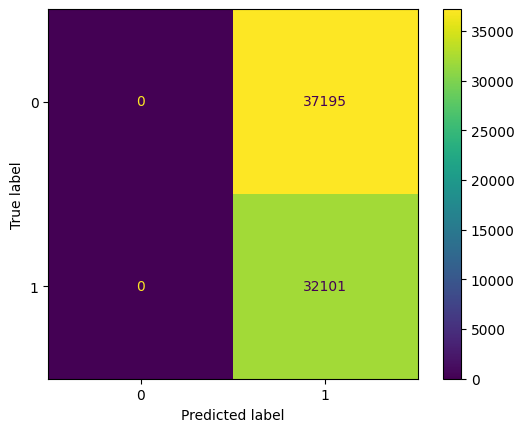

In [714]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)
disp.plot()

Determinados la exhaustividad(recall), la precision y la exactitud(accuracy)

In [715]:
rs = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print(f'Recall: {rs}')
print(f'Precision: {ps}')
print(f'Accuracy: {ac}')

Recall: 1.0
Precision: 0.46324463172477487
Accuracy: 0.46324463172477487


# Traemos el archivo test

Cargamos el DataFrame

In [740]:
parquet= r'test.parquet'
df_t= pd.read_parquet(parquet, engine='auto')
df_t.head(2)

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,1,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,1,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt


In [741]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38498 non-null  int64  
 1   url                      38498 non-null  object 
 2   region                   38498 non-null  object 
 3   region_url               38498 non-null  object 
 4   type                     38498 non-null  object 
 5   sqfeet                   38498 non-null  int64  
 6   beds                     38498 non-null  int64  
 7   baths                    38498 non-null  float64
 8   cats_allowed             38498 non-null  int64  
 9   dogs_allowed             38498 non-null  int64  
 10  smoking_allowed          38498 non-null  int64  
 11  wheelchair_access        38498 non-null  int64  
 12  electric_vehicle_charge  38498 non-null  int64  
 13  comes_furnished          38498 non-null  int64  
 14  laundry_options       

Realizamos las mismas transformaciones que realizamos para el train

In [742]:
#renombramos las columnas
df_t.rename(columns={'lat':'latitude', 'long':'longitude'}, inplace=True)

In [743]:
#Eliminamos los columanas por las razones explicadas con anterioridad
df_t.drop(['id', 'url', 'region_url', 'laundry_options', 'parking_options', 'image_url','latitude', 'longitude'], axis=1, inplace= True)

In [744]:
#Creamos la columna category_price
valores2= [-math.inf,999, 1999,math.inf]
category2= ['low','medium','high']
df_t2= df.assign(category_price= pd.cut(x=df['price'], bins=valores, labels=category, include_lowest=True))

In [745]:
#Creamos la columna target
df_t2['target']= df_t2['category_price'].apply(lambda x:1 if x=='low' else 0)

In [746]:
#Creamos la columna P2
valores2= [-math.inf,1, 2,math.inf]
category2= ['low','medium','high']
df_t2= df.assign(P2= pd.cut(x=df['baths'], bins=valores, labels=category, include_lowest=True))

In [747]:
#Se define la tabla test ha utilizar
test= df_t2
test.head(4)

,url,region,region_url,price,type,sqfeet,beds,baths,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,P1,Dato,P2
0,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id,medium,1,low
1,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co,low,0,low
2,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va,medium,1,low
3,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az,medium,1,low


Preparamos la columna description para utilizarla 

In [748]:
# Vemos descripciones faltantes en la columna descripción
test['description'].isnull().sum()

2

In [749]:
# Obtenemos los índices de los registros con descripciones vacías
sin_desc = test[test.description.isnull()].index
sin_desc

Int64Index([198741, 210823], dtype='int64')

Se crea una funcion para para rellenar la descripciones faltantes en la columna description

In [750]:
def crearDescription(df, num_loc):
    '''
    Arma la descripción faltante con datos existentes

    df: DataFrame a analizar
    num_loc: índice del registro a cambiar
    '''
    cadena = ''
    # Evaluamos con que características contamos para armar
    # las descripciónes faltantes de las propiedades
    if not df.isnull().type[num_loc]: 
            cadena += df.type[num_loc] + ' '
    if not df.isnull().region[num_loc]:
        cadena += df.region[num_loc] + ' '
    if not df.isnull().beds[num_loc]:
        cadena += str(int(df.beds[num_loc])) + ' habitaciones '
    if not df.isnull().baths[num_loc]:
        cadena += str(int(df.baths[num_loc])) + ' baños'
    
    return cadena

Ahora, recorremos los índices de los registros con descripciones faltantes para completarlas

In [751]:
for idx in sin_desc:
    test.loc[idx,('description')] = crearDescription(test, idx) 

In [752]:
# Verificamos que todas las propiedades tengan una descripción
test['description'].isnull().sum()

0

In [753]:
# Obtenemos los stop words de esta biblioteca 
sw = nltk.corpus.stopwords.words('spanish')

In [754]:
# Nos quedamos con la lista de los textos de las descripciones
corpus_t = test['description']

In [755]:
# Lo convertimos a lista
corpus_t = list(corpus_t)

In [756]:
# Verificamos el tamaño de los datos obtendos, para observar que coincide 
# con la cantidad de registros a predecir
len(corpus_t)

346479

Se realiza la modelizacion 

In [762]:
# Instanciamos el vectorizador con los stop words y un máximo de features de 1000
vectorizer_t = TfidfVectorizer(stop_words=sw, max_features=3)

In [763]:
# Vectorizamos los datos
x_t = vectorizer_t.fit_transform(corpus_t)

In [764]:
#Observamos la cantidad de datos obtenidos
x_t.shape

(346479, 3)

In [765]:
#Ajustamos el umbral de puntuacion (Adjust Score Threshold)
y_t_predict = np.where(rf.predict_proba(x_t) [:,1] > 0.2, 1, 0)

# Generación del CSV

Creamos el DataFrame que contendrá las predicciones obtenidas

In [766]:
datos = pd.DataFrame()

Creamos la columna pred con los datos obtendiso de la predicción

In [767]:
datos['pred'] = y_t_predict

Lo guardamos con formato CSV

In [768]:
datos.to_csv('Armegas.csv', index=False)